In [1]:
# Import các thư viện cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import os
import sys

# import feature_engineering
warnings.filterwarnings('ignore')

# Xử lý text
import re
from collections import Counter

# Feature engineering
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import PowerTransformer, QuantileTransformer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.decomposition import TruncatedSVD

# Data transformation
from scipy import stats
from scipy.stats import boxcox

# Thiết lập hiển thị
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [2]:
module_path = os.path.abspath(os.path.join('..', 'src'))
if module_path not in sys.path:
    sys.path.append(module_path)
from feature_engineering import plot_numerical_distribution

In [3]:
# Đọc dữ liệu train_raw
df_train = pd.read_csv('../data/cleaned/train_raw.csv')
print(f"Shape của dữ liệu: {df_train.shape}")
print(f"Số cột: {df_train.shape[1]}")
df_train.head()


Shape của dữ liệu: (8000, 21)
Số cột: 21


,budget,cast_top5,certification_US,collection_id,directors,genres,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,tagline,title,vote_count,vote_average
0,2.000000e+06,"Ethan Hawke,Julie Delpy,Wiley Wiggins,Bill Wis...",NR,-1.0,Richard Linklater,"Animation,Drama,Fantasy","dreams,philosophy,parallel world,existence,adu...",en,Waking Life,Waking Life is about a young man in a persiste...,4.3827,"IFC Productions,Thousand Words,Detour Filmprod...",US,2001-10-19,3176880.0,101.0,en,Dreams. What are they? An escape from reality ...,Waking Life,914,7.470
1,3.000000e+06,"Erkan Kolçak Köstendil,Ali Atay,Şebnem Bozoklu...",NR,-1.0,Can Ulkay,"History,Drama,War","world war i,ice cream,gallipoli campaign,broke...",tr,Türk İşi Dondurma,"In 1915, two Turks in Australia make a living ...",1.7656,Dijital Sanatlar,TR,2019-03-15,1289283.0,120.0,"tr,en",NaN,Turkish Ice Cream,42,5.900
2,4.000000e+06,"Dennis Hopper,Asia Argento,Helen Shaver,Lochly...",R,-1.0,Paul Lynch,"Crime,Drama,Thriller","kidnapping,hostage,psychopath,deputy sheriff,s...",en,The Keeper,When an apparently exemplary cop abducts and s...,7.2882,Peace Arch Films,"GB,CA",2004-05-14,73788.0,95.0,en,NaN,The Keeper,32,4.375
3,1.050910e+07,"Jimmy Bennett,Adam Taylor Gordon,Ashley Rose O...",G,-1.0,"Larry Leichliter,Bill Melendez","Animation,Comedy,Family,TV Movie","holiday,dog",en,"I Want a Dog for Christmas, Charlie Brown",Linus and Lucy's younger brother Rerun wants a...,5.2636,"Lee Mendelson Film Productions,Charles M. Schu...",US,2003-12-09,0.0,49.0,en,NaN,"I Want a Dog for Christmas, Charlie Brown",55,5.845
4,6.300000e+05,"John Schneider,Luke Benjamin Bernard,Matthew F...",PG-13,-1.0,Curtis Graham,Drama,Unknown,en,The Favorite,Inspired by the true events of Luke Benjamin B...,3.4839,Unknown,US,2019-09-13,36800000.0,108.0,en,"One brother fights for his life, the other fig...",The Favorite,2,6.000


In [4]:
# Đọc dữ liệu train_raw
df_test = pd.read_csv('../data/cleaned/test_raw.csv')
print(f"Shape của dữ liệu: {df_test.shape}")
print(f"Số cột: {df_test.shape[1]}")
df_test.head()

Shape của dữ liệu: (2000, 21)
Số cột: 21


,budget,cast_top5,certification_US,collection_id,directors,genres,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,tagline,title,vote_count,vote_average
0,5.000000e+02,"Erana James,Stig Eldred,Sam Harris",NR,-1.0,Mason Cade Packer,Unknown,Unknown,en,1882,The region is in a state of unrest. Rumors of ...,0.5579,Unknown,Unknown,2017-12-13,0.0,5.0,en,A proof-of-concept short film,1882,1,10.000
1,8.500000e+07,"Ben Schwartz,James Marsden,Tika Sumpter,Jim Ca...",PG,720879.0,Jeff Fowler,"Action,Science Fiction,Comedy,Family","friendship,video game,san francisco, californi...",en,Sonic the Hedgehog,"Powered with incredible speed, Sonic The Hedge...",9.0558,"Original Film,Blur Studio,Marza Animation Plan...","JP,US",2020-02-12,319715683.0,99.0,en,A whole new speed of hero.,Sonic the Hedgehog,10144,7.296
2,1.517000e+08,"Tony Fadil,Elliot Cable,Mark Wingett,Sonera An...",NR,-1.0,Steven M. Smith,"Comedy,Horror,Science Fiction","horror spoof,survival horror,zombie apocalypse",en,Dead Again,A VIRUS IS LOOSE. In rural village where crime...,6.3187,Greenway Entertainment,Unknown,2020-10-16,2000000.0,75.0,en,Lockdown Won't Save You,Dead Again,14,4.700
3,3.558303e+06,"Jesús Bonilla,Santiago Segura,Concha Velasco,A...",NR,-1.0,Jesús Bonilla,"Action,Adventure,Comedy",Unknown,es,El oro de Moscú,In an odd destiny coincidence and hospital emp...,1.3139,Amiguetes Entertainment,ES,2003-03-28,6890947.0,100.0,es,NaN,Moscow Gold,66,5.400
4,5.317828e+06,"Neeru Bajwa,Binnu Dhillon,Anita Devgan,Rana Ra...",NR,-1.0,Pankaj Batra,"Crime,Drama",Unknown,pa,Channo Kamli Yaar Di,A Punjabi girl travels to Canada to find her m...,4.8295,Neeru Bajwa Entertainment,IN,2016-02-19,0.0,144.0,"en,pa",NaN,Channo Kamli Yaar Di,1,4.000


# 1. FEATURE ENGINEERING CHO DỮ LIỆU DẠNG BẢNG (Transformation)

In [5]:
df_train_fe = df_train.copy()
df_test_fe = df_test.copy()


## 1.1. Xử lý dữ liệu thời gian

**Vấn đề**

Ngày phát hành (release_date) là dữ liệu datetime nhưng cần tách thành các features riêng biệt (năm, tháng, ngày) và tạo features có ý nghĩa như mùa, ngày trong tuần.

**Ý tưởng giải quyết:**
- **Temporal Features**: Tách năm, tháng, ngày, quý từ datetime
- **Day of Week**: Ngày trong tuần (0=Monday, 6=Sunday)
- **Weekend Indicator**: Binary feature cho cuối tuần (thường có doanh thu cao hơn)
- **Movie Age**: Tuổi của phim tính từ năm phát hành đến hiện tại

**Kỹ thuật xử lý:**
- Sử dụng `pd.to_datetime()` để chuyển đổi sang datetime
- Dùng `.dt` accessor để extract year, month, day, quarter, dayofweek
- Tạo binary feature cho weekend (dayofweek >= 5)


In [6]:
# Xử lý release_date features
if 'release_date' in df_train_fe.columns:
    df_train_fe['release_date'] = pd.to_datetime(df_train_fe['release_date'], errors='coerce')
    if 'release_year' not in df_train_fe.columns:
        df_train_fe['release_year'] = df_train_fe['release_date'].dt.year
    if 'release_month' not in df_train_fe.columns:
        df_train_fe['release_month'] = df_train_fe['release_date'].dt.month
    if 'release_day' not in df_train_fe.columns:
        df_train_fe['release_day'] = df_train_fe['release_date'].dt.day
    df_train_fe['release_quarter'] = df_train_fe['release_date'].dt.quarter
    df_train_fe['release_dayofweek'] = df_train_fe['release_date'].dt.dayofweek
    df_train_fe['release_is_weekend'] = (df_train_fe['release_dayofweek'] >= 5).astype(int)

if 'release_date' in df_test_fe.columns:
    df_test_fe['release_date'] = pd.to_datetime(df_test_fe['release_date'], errors='coerce')
    if 'release_year' not in df_test_fe.columns:
        df_test_fe['release_year'] = df_test_fe['release_date'].dt.year
    if 'release_month' not in df_test_fe.columns:
        df_test_fe['release_month'] = df_test_fe['release_date'].dt.month
    if 'release_day' not in df_test_fe.columns:
        df_test_fe['release_day'] = df_test_fe['release_date'].dt.day
    df_test_fe['release_quarter'] = df_test_fe['release_date'].dt.quarter
    df_test_fe['release_dayofweek'] = df_test_fe['release_date'].dt.dayofweek
    df_test_fe['release_is_weekend'] = (df_test_fe['release_dayofweek'] >= 5).astype(int)


# Tính tuổi của phim
if 'release_year' in df_train_fe.columns:
    current_year = 2025  # Hoặc có thể dùng pd.Timestamp.now().year
    df_train_fe['movie_age'] = current_year - df_train_fe['release_year']

if 'release_year' in df_test_fe.columns:
    current_year = 2025  # Hoặc có thể dùng pd.Timestamp.now().year
    df_test_fe['movie_age'] = current_year - df_test_fe['release_year']

df_test_fe.head(5)

,budget,cast_top5,certification_US,collection_id,directors,genres,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,tagline,title,vote_count,vote_average,release_year,release_month,release_day,release_quarter,release_dayofweek,release_is_weekend,movie_age
0,5.000000e+02,"Erana James,Stig Eldred,Sam Harris",NR,-1.0,Mason Cade Packer,Unknown,Unknown,en,1882,The region is in a state of unrest. Rumors of ...,0.5579,Unknown,Unknown,2017-12-13,0.0,5.0,en,A proof-of-concept short film,1882,1,10.000,2017,12,13,4,2,0,8
1,8.500000e+07,"Ben Schwartz,James Marsden,Tika Sumpter,Jim Ca...",PG,720879.0,Jeff Fowler,"Action,Science Fiction,Comedy,Family","friendship,video game,san francisco, californi...",en,Sonic the Hedgehog,"Powered with incredible speed, Sonic The Hedge...",9.0558,"Original Film,Blur Studio,Marza Animation Plan...","JP,US",2020-02-12,319715683.0,99.0,en,A whole new speed of hero.,Sonic the Hedgehog,10144,7.296,2020,2,12,1,2,0,5
2,1.517000e+08,"Tony Fadil,Elliot Cable,Mark Wingett,Sonera An...",NR,-1.0,Steven M. Smith,"Comedy,Horror,Science Fiction","horror spoof,survival horror,zombie apocalypse",en,Dead Again,A VIRUS IS LOOSE. In rural village where crime...,6.3187,Greenway Entertainment,Unknown,2020-10-16,2000000.0,75.0,en,Lockdown Won't Save You,Dead Again,14,4.700,2020,10,16,4,4,0,5
3,3.558303e+06,"Jesús Bonilla,Santiago Segura,Concha Velasco,A...",NR,-1.0,Jesús Bonilla,"Action,Adventure,Comedy",Unknown,es,El oro de Moscú,In an odd destiny coincidence and hospital emp...,1.3139,Amiguetes Entertainment,ES,2003-03-28,6890947.0,100.0,es,NaN,Moscow Gold,66,5.400,2003,3,28,1,4,0,22
4,5.317828e+06,"Neeru Bajwa,Binnu Dhillon,Anita Devgan,Rana Ra...",NR,-1.0,Pankaj Batra,"Crime,Drama",Unknown,pa,Channo Kamli Yaar Di,A Punjabi girl travels to Canada to find her m...,4.8295,Neeru Bajwa Entertainment,IN,2016-02-19,0.0,144.0,"en,pa",NaN,Channo Kamli Yaar Di,1,4.000,2016,2,19,1,4,0,9


## 1.2. Xử lý dữ liệu dạng số (Numerical transformation)

Những attributes dạng số: budget, revenue, vote_average, vote_count, runtime, popularity

### 1.2.1. Data transformation

**a. Xử lý data phân phối lệch**

**Vấn đề:**

Các biến số như budget, revenue, runtime, vote_count hay popularity có phân phối lệch phải, những outlier này quan trọng nên không remove.
* Có những phim có budget và revenue cao làm dữ liệu lệch phải dẫn đến dùng khi dùng các model linear thì nhạy với với outlier lớn.

**Ý tưởng giải quyết**

Dùng log transformation, đưa các biến số về phân phối dạng chuẩn và giảm sức ảnh hưởng của outlier.

Công thức: $x_{new} = \ln(x + 1)$.

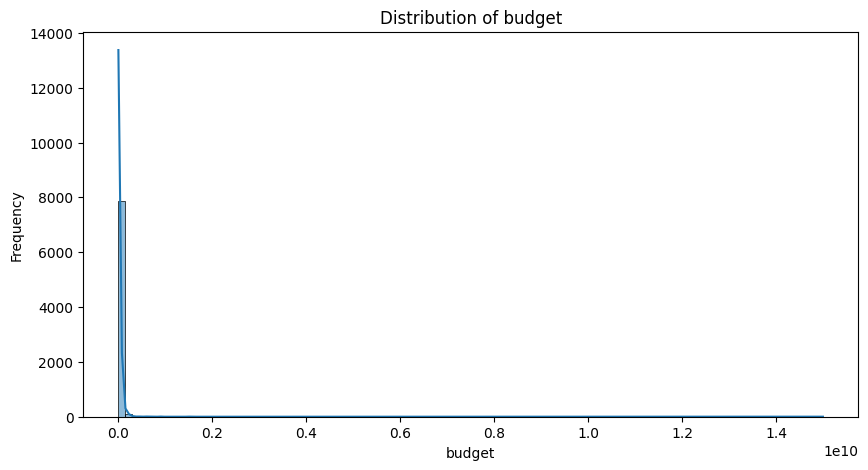

In [7]:
plot_numerical_distribution(df_train_fe, 'budget', 100)

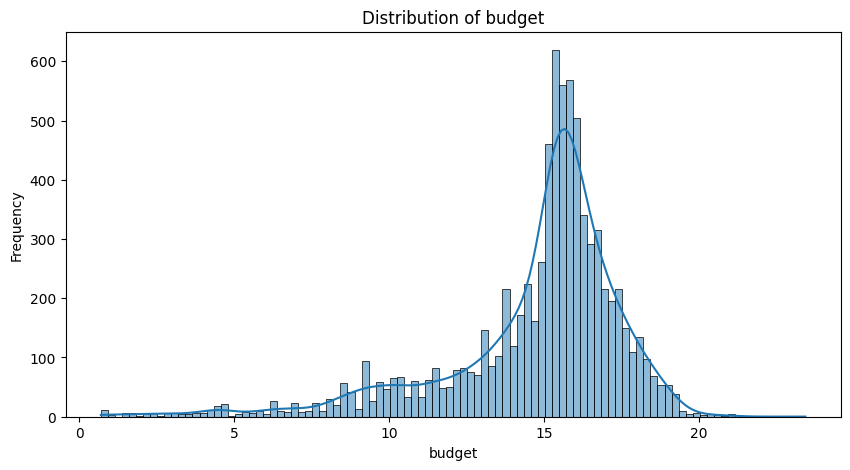

In [8]:
df_train_fe['budget'] = np.log1p(df_train_fe['budget'])
# df_train_fe['vote_count'] = np.log1p(df_train_fe['vote_count'])
df_train_fe['revenue'] = np.log1p(df_train_fe['revenue'])

df_test_fe['budget'] = np.log1p(df_test_fe['budget'])
df_test_fe['revenue'] = np.log1p(df_test_fe['revenue'])


plot_numerical_distribution(df_train_fe, 'budget', 100)

**b. Xử lý data có phân phối xấp xỉ Gauss và có outlier**

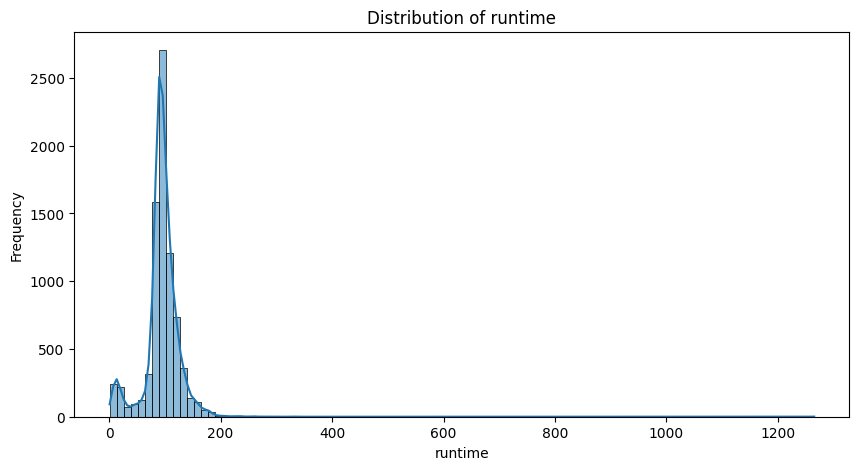

In [9]:
plot_numerical_distribution(df_train_fe, 'runtime', 100)

runtime có giá trị luôn lớn hơn 0, lệch phải, phần đuôi bên phải kéo dài hơn so với bên trái.

**Ý tưởng giải quyết:**

Dùng Box-cox transformation dùng mạnh cho dữ liệu dương, tự động tìm giá trị $\lambda$ tối ưu để biến dữ liệu này thành phân phối chuẩn nhất có thể.

**Kỹ thuật sử dụng:**
- Sử dụng `scipy.stats.boxcox()` để tìm lambda tối ưu và transform dữ liệu
- Xử lý missing values và giá trị <= 0 trước khi transform
- Lưu lambda để có thể inverse transform sau này nếu cần

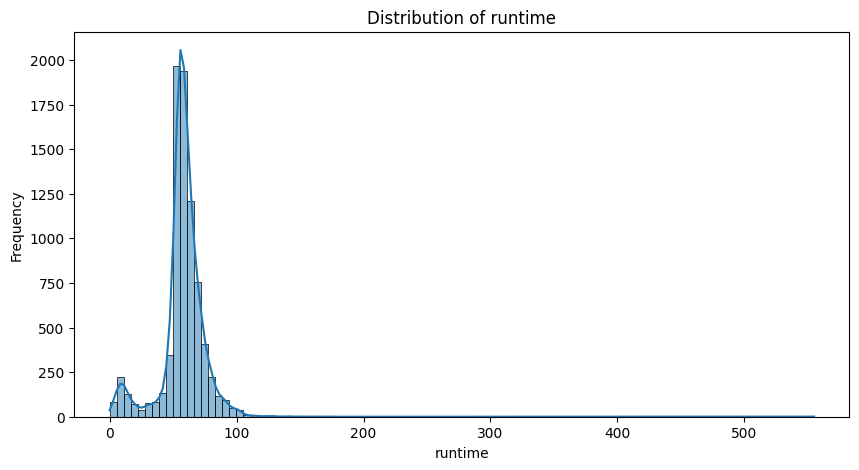

In [10]:
# Fit lambda trên train
runtime_train = df_train_fe['runtime'].copy()
runtime_transformed_train, fitted_lambda = boxcox(runtime_train)
df_train_fe['runtime'] = runtime_transformed_train

# Transform test với cùng lambda (đã fit từ train)
runtime_test = df_test_fe['runtime'].copy()
runtime_transformed_test = boxcox(runtime_test, lmbda=fitted_lambda)
df_test_fe['runtime'] = runtime_transformed_test

plot_numerical_distribution(df_train_fe, 'runtime', 100)


**c. Xử lý Popularity với phân phối Multimodal**

**Vấn đề**

Cột `popularity` có phân phối multimodal (nhiều đỉnh) với 2-3 peaks rõ ràng và right-skewed tail. Phân phối này không phù hợp với các giả định của nhiều model machine learning (như normal distribution).

**Cách giải quyết:**
- Sử dụng log transformation để giảm skewness và làm phẳng các peaks

**Kỹ thuật sử dụng:**
- Sử dụng `np.log1p()` (log(1+x)) để tránh log(0) và xử lý giá trị nhỏ.
- So sánh kết quả và chọn transformation phù hợp nhất


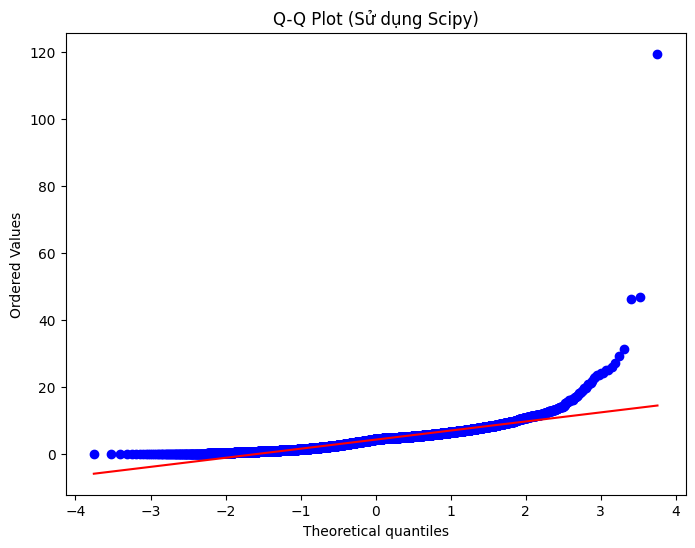

In [11]:
import scipy.stats as stats

plt.figure(figsize=(8, 6))
stats.probplot(df_train_fe['popularity'], dist="norm", plot=plt)
plt.title("Q-Q Plot (Sử dụng Scipy)")
plt.show()

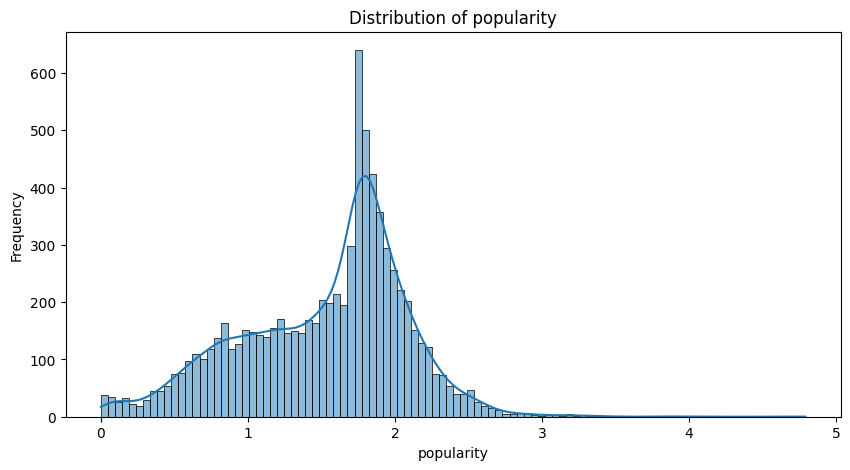

In [12]:
popularity_data = df_train_fe['popularity'].copy()

popularity_log = np.log1p(popularity_data)
df_train_fe['popularity'] = popularity_log

popularity_data = df_test_fe['popularity'].copy()

popularity_log = np.log1p(popularity_data)
df_test_fe['popularity'] = popularity_log
    
plot_numerical_distribution(df_train_fe, 'popularity', 100)

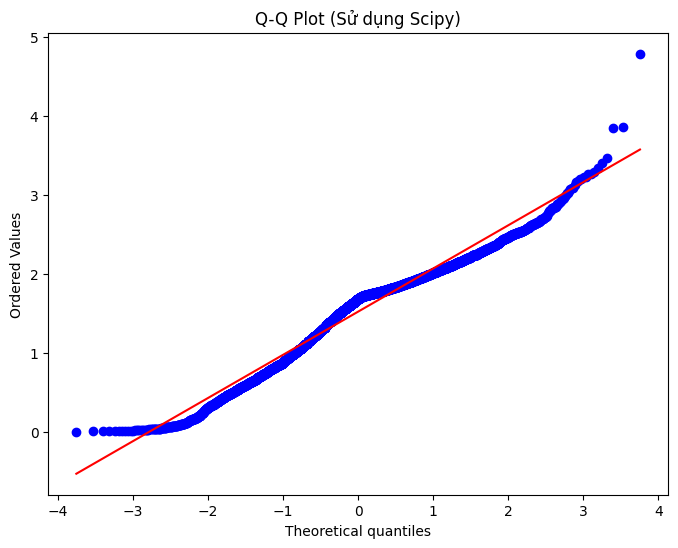

In [13]:
plt.figure(figsize=(8, 6))
stats.probplot(df_train_fe['popularity'], dist="norm", plot=plt)
plt.title("Q-Q Plot (Sử dụng Scipy)")
plt.show()

## 1.3. Xử lý categorical data

### 1.3.1. Xử lý cột Genres

Genres là dữ liệu categorical dạng multi-label (một phim có thể có nhiều thể loại), cần chuyển đổi thành features số có ý nghĩa. Số lượng genres và loại genres cụ thể có thể ảnh hưởng đến rating và doanh thu.

**Cách giải quyết**
- **Chuyển genres thành list**: Parse genres string thành list để xử lý dễ dàng hơn
- Thêm feature **num_genres**: Số lượng thể loại - phim có nhiều genres có thể có audience rộng hơn
- Sử dụng `MultiLabelBinarizer` từ sklearn để tự động tạo binary features cho tất cả genres unique
- **Binary Genre Features**: Mỗi genre có một cột riêng (1 nếu phim thuộc genre đó, 0 nếu không)

**Kỹ thuật sử dụng:**
- **Parse genres**: Split string bằng dấu phẩy và chuyển thành list, xử lý missing values (trả về empty list)
- **MultiLabelBinarizer**: 
  - `fit_transform()` trên list of lists để tạo binary matrix
  - Tự động tạo binary features cho tất cả genres unique trong dataset
  - Không cần chọn top genres thủ công, encode tất cả genres
- **Normalize tên cột**: Tên genre được normalize (lowercase, replace space với underscore) cho tên cột
- **Concatenation**: Kết hợp encoded genres với dataframe chính bằng `pd.concat()`


In [14]:
def parse_genres(genres_str):
    """Chuyển đổi genres string thành list"""
    if pd.isna(genres_str) or genres_str == '' or str(genres_str) == 'nan':
        return []
        
    genres_list = [g.strip() for g in str(genres_str).split(',') if g.strip()]
    return genres_list


if 'genres' in df_train_fe.columns:
    # a. Chuyển genres thành dạng list cho cả train và test
    df_train_fe['genres_list'] = df_train_fe['genres'].apply(parse_genres)
    df_test_fe['genres_list'] = df_test_fe['genres'].apply(parse_genres)
    
    # Tính số lượng genres
    df_train_fe['num_genres'] = df_train_fe['genres_list'].apply(len)
    df_test_fe['num_genres'] = df_test_fe['genres_list'].apply(len)
    

    mlb = MultiLabelBinarizer()
    genres_encoded_train = mlb.fit_transform(df_train_fe['genres_list'])
    genres_encoded_test = mlb.transform(df_test_fe['genres_list'])  # Transform với cùng classes
    
    # Tạo DataFrame từ encoded genres
    genre_columns = [f'genre_{genre.lower().replace(" ", "_")}' for genre in mlb.classes_]
    genres_df_train = pd.DataFrame(genres_encoded_train, columns=genre_columns, index=df_train_fe.index)
    genres_df_test = pd.DataFrame(genres_encoded_test, columns=genre_columns, index=df_test_fe.index)
    
    # Kết hợp với dataframe chính
    df_train_fe = pd.concat([df_train_fe, genres_df_train], axis=1)
    df_test_fe = pd.concat([df_test_fe, genres_df_test], axis=1)
    
    print(f"Thêm {len(mlb.classes_)} binary features cho genres")
    print(f"Train shape: {df_train_fe.shape}, Test shape: {df_test_fe.shape}")


Thêm 20 binary features cho genres
Train shape: (8000, 50), Test shape: (2000, 50)


### 1.3.2. Xử lý cột cast_top_5

Cột `cast_top_5` chứa danh sách tên diễn viên (top 5 diễn viên chính) của mỗi phim, được lưu dưới dạng string phân cách bởi dấu phẩy. Số lượng diễn viên và sự hiện diện của các diễn viên nổi tiếng có thể ảnh hưởng đến doanh thu và rating của phim.

**Cách giải quyết:**
- **Chuyển cast thành list**: Parse cast string thành list để xử lý dễ dàng hơn
- **num_cast**: Số lượng diễn viên trong top 5 - phim có nhiều diễn viên nổi tiếng có thể thành công hơn
- **cast_list**: Lưu danh sách cast dưới dạng list để có thể sử dụng sau này (nếu cần)

**Kỹ thuật sử dụng:**
- **Parse cast**: Split string bằng dấu phẩy và chuyển thành list, xử lý missing values (trả về empty list)
- **Đếm số lượng**: Sử dụng `len()` để đếm số diễn viên
- **Binary feature**: Tạo feature `has_cast` bằng cách check xem list có rỗng hay không
- **Xử lý edge cases**: Xử lý các trường hợp đặc biệt như string rỗng, 'nan', hoặc missing values


In [15]:
# Xử lý cast cho cả train và test
cast_col = 'cast_top5'

# Chuyển cast thành dạng list
def parse_cast(cast_str):
    if pd.isna(cast_str) or cast_str == '' or str(cast_str) == 'nan':
        return []
    # Split bằng dấu phẩy và strip whitespace
    cast_list = [c.strip() for c in str(cast_str).split(',') if c.strip()]
    return cast_list

# Xử lý cho cả train và test
df_train_fe['cast_list'] = df_train_fe[cast_col].apply(parse_cast)
df_test_fe['cast_list'] = df_test_fe[cast_col].apply(parse_cast)

# Tính số lượng cast
df_train_fe['num_cast'] = df_train_fe['cast_list'].apply(len)
df_test_fe['num_cast'] = df_test_fe['cast_list'].apply(len)

# Binary feature has_cast
df_train_fe['has_cast'] = (df_train_fe['num_cast'] > 0).astype(int)
df_test_fe['has_cast'] = (df_test_fe['num_cast'] > 0).astype(int)

print(f"Train shape: {df_train_fe.shape}, Test shape: {df_test_fe.shape}")


Train shape: (8000, 53), Test shape: (2000, 53)


### 1.3.3. Xử lý cột directors

Cột `directors` chứa danh sách đạo diễn của mỗi phim (có thể có nhiều đạo diễn), được lưu dưới dạng string phân cách bởi dấu phẩy. Nếu dùng one-hot encoding sẽ tạo ra quá nhiều features (curse of dimensionality) vì có rất nhiều đạo diễn unique trong dataset. Cần một phương pháp encoding hiệu quả hơn để capture thông tin về đạo diễn mà không tạo ra quá nhiều chiều.

**Cách giải quyết:**
- **Lấy đạo diễn đầu tiên**: Nếu có nhiều đạo diễn, chỉ lấy đạo diễn đầu tiên (thường là đạo diễn chính)
- **Target Encoding với Smoothing**: 
  - Encode đạo diễn bằng mean của target variable (vote_average) cho mỗi đạo diễn
  - Sử dụng Smoothing để tránh overfitting: đạo diễn có ít phim sẽ được điều chỉnh về global mean
  - Công thức: 
  $$
  \text{Score} = \frac{n \times \text{Mean}_{\text{director}} + \alpha \times \text{Mean}_{\text{global}}}{n + \alpha}
  $$
  - Trong đó: $n$ = số phim của đạo diễn, $\alpha$ = smoothing parameter (thường = 1-10)
  - Đạo diễn làm nhiều phim (n lớn): Trọng số tiến về mean của đạo diễn $\rightarrow$ Tin vào năng lực thực tế của họ
  - Đạo diễn làm ít phim (n nhỏ): Trọng số tiến về global mean $\rightarrow$ Tránh thiên kiến
- **Count Encoding**: Đếm số lần xuất hiện của mỗi đạo diễn trong dataset - đạo diễn làm nhiều phim thường có kinh nghiệm hơn

**Kỹ thuật sử dụng:**
- **Parse directors**: Split string bằng dấu phẩy, lấy phần tử đầu tiên (đạo diễn chính)
- **Target Encoding**: 
  - Tính mean của target variable (vote_average) cho mỗi đạo diễn
  - Áp dụng smoothing với công thức trên
  - Xử lý missing values bằng global mean
- **Count Encoding**: 
  - Đếm số lần mỗi đạo diễn xuất hiện trong dataset
  - Sử dụng `value_counts()` để đếm frequency
  - Map count vào mỗi phim


In [16]:
# Lấy đạo diễn đầu tiên (đạo diễn chính)
def get_first_director(directors_str):
    if pd.isna(directors_str) or directors_str == '' or str(directors_str) == 'nan':
        return None
    directors_list = [d.strip() for d in str(directors_str).split(',') if d.strip()]
    return directors_list[0] if directors_list else None

# Xử lý directors cho cả train và test
# FIT trên train (tính statistics), TRANSFORM cả train và test

# Lấy đạo diễn đầu tiên cho cả train và test
df_train_fe['director_first'] = df_train_fe['directors'].apply(get_first_director)
df_test_fe['director_first'] = df_test_fe['directors'].apply(get_first_director)

# Target Encoding với Smoothing - FIT trên train
target_col = 'revenue'  # Target Encoding với Smoothing
global_mean = df_train_fe[target_col].mean()  # Tính từ train
director_target_mean = df_train_fe.groupby('director_first')[target_col].mean()  # Tính từ train
director_counts = df_train_fe['director_first'].value_counts()  # Đếm từ train

# Smoothing parameter (alpha)
alpha = 5

def target_encode_smooth(director):
    if pd.isna(director) or director is None:
        return global_mean
    
    if director in director_target_mean.index:
        director_mean = director_target_mean[director]
        n = director_counts[director]
        # Công thức smoothing: (n * mean_director + alpha * global_mean) / (n + alpha)
        smoothed_score = (n * director_mean + alpha * global_mean) / (n + alpha)
        return smoothed_score
    else:
        return global_mean

# Apply cho cả train và test (cùng function, cùng global_mean và director_target_mean từ train)
df_train_fe['director_target_encoded'] = df_train_fe['director_first'].apply(target_encode_smooth)
df_test_fe['director_target_encoded'] = df_test_fe['director_first'].apply(target_encode_smooth)

# Count Encoding - FIT trên train, TRANSFORM cả train và test
director_counts_dict = df_train_fe['director_first'].value_counts().to_dict()  # Từ train
df_train_fe['director_count_encoded'] = df_train_fe['director_first'].map(director_counts_dict).fillna(0)
df_test_fe['director_count_encoded'] = df_test_fe['director_first'].map(director_counts_dict).fillna(0)  # Cùng dict từ train

print(f"Train shape: {df_train_fe.shape}, Test shape: {df_test_fe.shape}")
if director_counts_dict:
    max_director = max(director_counts_dict, key=director_counts_dict.get)
    max_count = director_counts_dict[max_director]
    print(f"  Director xuất hiện nhiều nhất: {max_director} ({max_count} phim)")

Train shape: (8000, 56), Test shape: (2000, 56)
  Director xuất hiện nhiều nhất: Unknown (55 phim)


### 1.3.4. Xử lý các cột categorical khác


#### a. Xử lý cột certification_US (Ordinal Encoding)

**Vấn đề:**

Cột `certification_US` chứa rating của phim (G, PG, PG-13, R, NR) theo hệ thống phân loại của Mỹ. Các rating này có thứ tự có ý nghĩa (từ phù hợp trẻ em đến người lớn), nên cần encoding theo thứ tự này.

**Cách giải quyết:**
- **Ordinal Encoding với mapping**: Gán số thứ tự cho mỗi rating dựa trên độ tuổi phù hợp
- Mapping: G=1, PG=2, PG-13=3, R=4, NR=0 (không có rating)

**Kỹ thuật sử dụng:**
- Tạo dictionary mapping rating → số thứ tự
- Sử dụng `map()` để encode
- Fill missing values với giá trị mặc định (0 hoặc median)


In [17]:

# Xử lý certification cho cả train và test
# Ordinal Encoding - cùng mapping cho cả train và test

certification_mapping = {
    'G': 1,      # General Audiences - Mọi lứa tuổi
    'PG': 2,     # Parental Guidance - Cần sự hướng dẫn của phụ huynh
    'PG-13': 3,  # Parents Strongly Cautioned - Trẻ em dưới 13 tuổi cần sự hướng dẫn
    'R': 4,      # Restricted - Người lớn (17+)
    'NR': 0      # Not Rated - Không có rating
}

# Apply cùng mapping cho cả train và test
df_train_fe['certification_US_encoded'] = df_train_fe['certification_US'].map(certification_mapping).fillna(0)
df_test_fe['certification_US_encoded'] = df_test_fe['certification_US'].map(certification_mapping).fillna(0)

print("Train certification distribution:")
for rating, code in certification_mapping.items():
    count = (df_train_fe['certification_US_encoded'] == code).sum()
    print(f"    {rating} ({code}): {count} phim")

print(f"\nTrain shape: {df_train_fe.shape}, Test shape: {df_test_fe.shape}")


Train certification distribution:
    G (1): 161 phim
    PG (2): 363 phim
    PG-13 (3): 713 phim
    R (4): 1148 phim
    NR (0): 5615 phim

Train shape: (8000, 57), Test shape: (2000, 57)


#### b. Xử lý cột original_language (One-hot Encoding)

**Vấn đề:**
Cột `original_language` chứa mã ngôn ngữ gốc của phim (en, fr, es, etc.). Số lượng ngôn ngữ unique không quá nhiều, nên có thể dùng one-hot encoding.

**Cách giải quyết:**
- **One-hot Encoding**: Tạo binary features cho mỗi ngôn ngữ phổ biến
- Chỉ encode top 15 ngôn ngữ phổ biến nhất để tránh quá nhiều features

**Kỹ thuật sử dụng:**
- Sử dụng `pd.get_dummies()` hoặc tạo binary features thủ công
- Chỉ lấy top N ngôn ngữ phổ biến nhất
- Tạo feature `language_other` cho các ngôn ngữ không thuộc top 15


In [18]:
old_lang_cols = [col for col in df_train_fe.columns if col.startswith('language_')]
if old_lang_cols:
    df_train_fe = df_train_fe.drop(columns=old_lang_cols)
    df_test_fe = df_test_fe.drop(columns=[col for col in df_test_fe.columns if col in old_lang_cols])

top_n_languages = 15
language_counts_train = df_train_fe['original_language'].value_counts()
top_languages = language_counts_train.head(top_n_languages).index.tolist()  # Chỉ lấy top 15

# Tạo one-hot encoding cho TOP languages (cả train và test với cùng columns)
for lang in top_languages:
    col_name = f'language_{lang}'
    df_train_fe[col_name] = (df_train_fe['original_language'] == lang).astype(int)
    df_test_fe[col_name] = (df_test_fe['original_language'] == lang).astype(int)  # Cùng columns

# Feature cho các ngôn ngữ khác (không thuộc top 15)
df_train_fe['language_other'] = (~df_train_fe['original_language'].isin(top_languages)).astype(int)
df_test_fe['language_other'] = (~df_test_fe['original_language'].isin(top_languages)).astype(int)


#### c. Xử lý cột production_companies (Smoothed Target Encoding)

Cột `production_companies` chứa danh sách công ty sản xuất (có thể có nhiều công ty), được lưu dưới dạng string phân cách bởi dấu phẩy. Số lượng công ty unique rất nhiều, nên không thể dùng one-hot encoding.

**Cách giải quyết:**
- **Lấy công ty đầu tiên**: Nếu có nhiều công ty, chỉ lấy công ty đầu tiên (công ty chính)
- **Smoothed Target Encoding**: Encode công ty bằng mean của target variable (vote_average) cho mỗi công ty


**Kỹ thuật sử dụng:**
- Parse string và lấy công ty đầu tiên
- Tính mean của target cho mỗi công ty
- Áp dụng smoothing với alpha parameter
- Xử lý missing values bằng global mean


In [19]:
def get_first_company(companies_str):
    if pd.isna(companies_str) or companies_str == '' or str(companies_str) == 'nan':
        return None
    companies_list = [c.strip() for c in str(companies_str).split(',') if c.strip()]
    return companies_list[0] if companies_list else None

# Lấy công ty đầu tiên cho cả train và test
df_train_fe['company_first'] = df_train_fe['production_companies'].apply(get_first_company)
df_test_fe['company_first'] = df_test_fe['production_companies'].apply(get_first_company)

# Smoothed Target Encoding - FIT trên train
target_col = 'revenue'

global_mean = df_train_fe[target_col].mean()  # Tính từ train
company_target_mean = df_train_fe.groupby('company_first')[target_col].mean()  # Tính từ train
company_counts = df_train_fe['company_first'].value_counts()  # Đếm từ train

alpha = 5  # Smoothing parameter

def target_encode_smooth(company):
    if pd.isna(company) or company is None:
        return global_mean
    
    if company in company_target_mean.index:
        company_mean = company_target_mean[company]
        n = company_counts[company]
        smoothed_score = (n * company_mean + alpha * global_mean) / (n + alpha)
        return smoothed_score
    else:
        return global_mean

# Apply cho cả train và test (cùng function, cùng global_mean và company_target_mean từ train)
df_train_fe['company_target_encoded'] = df_train_fe['company_first'].apply(target_encode_smooth)
df_test_fe['company_target_encoded'] = df_test_fe['company_first'].apply(target_encode_smooth)

print(f"Train shape: {df_train_fe.shape}, Test shape: {df_test_fe.shape}")



Train shape: (8000, 75), Test shape: (2000, 75)


#### d. Xử lý cột production_countries (MultiLabelBinarizer - chỉ lấy countries chính)

**Vấn đề:**
Cột `production_countries` chứa danh sách quốc gia sản xuất (có thể có nhiều quốc gia), được lưu dưới dạng string phân cách bởi dấu phẩy. Cần encode thành binary features nhưng chỉ lấy các quốc gia chính (phổ biến nhất).

**Cách giải quyết:**
- **Chuyển countries thành list**: Parse string thành list
- **Lọc countries chính**: Chỉ lấy top N countries phổ biến nhất
- **MultiLabelBinarizer**: Sử dụng MultiLabelBinarizer để tạo binary features cho các countries chính

**Kỹ thuật sử dụng:**
- Parse countries string thành list
- Đếm frequency và lấy top N countries
- Sử dụng MultiLabelBinarizer với classes được giới hạn chỉ top N countries
- Tạo binary features cho mỗi country chính


In [20]:
def parse_countries(countries_str):
    if pd.isna(countries_str) or countries_str == '' or str(countries_str) == 'nan':
        return []
    countries_list = [c.strip() for c in str(countries_str).split(',') if c.strip()]
    return countries_list

df_train_fe['countries_list'] = df_train_fe['production_countries'].apply(parse_countries)
df_test_fe['countries_list'] = df_test_fe['production_countries'].apply(parse_countries)

# Tìm TOP 20 COUNTRIES PHỔ BIẾN NHẤT từ TRAIN
top_n_countries = 20
all_countries_list_train = []
for countries_list in df_train_fe['countries_list']:
    all_countries_list_train.extend(countries_list)

country_counts = Counter(all_countries_list_train)
top_countries = [country for country, _ in country_counts.most_common(top_n_countries)]  # Chỉ lấy top 20

# Lọc countries - chỉ giữ lại top countries
df_train_fe['countries_filtered'] = df_train_fe['countries_list'].apply(
    lambda x: [c for c in x if c in top_countries]
)
df_test_fe['countries_filtered'] = df_test_fe['countries_list'].apply(
    lambda x: [c for c in x if c in top_countries]
)

# FIT trên train, TRANSFORM cả train và test (chỉ với top countries)
mlb = MultiLabelBinarizer()
countries_encoded_train = mlb.fit_transform(df_train_fe['countries_filtered'])
countries_encoded_test = mlb.transform(df_test_fe['countries_filtered'])  # Transform với cùng classes

country_columns = [f'country_{country.lower().replace(" ", "_")}' for country in mlb.classes_]
countries_df_train = pd.DataFrame(countries_encoded_train, columns=country_columns, index=df_train_fe.index)
countries_df_test = pd.DataFrame(countries_encoded_test, columns=country_columns, index=df_test_fe.index)

# Xóa các cột country cũ nếu có
old_cols = [col for col in df_train_fe.columns if col.startswith('country_')]
if old_cols:
    df_train_fe = df_train_fe.drop(columns=old_cols)
    df_test_fe = df_test_fe.drop(columns=[col for col in df_test_fe.columns if col in old_cols])

df_train_fe = pd.concat([df_train_fe, countries_df_train], axis=1)
df_test_fe = pd.concat([df_test_fe, countries_df_test], axis=1)


## 1.4. Tạo feature mới

Các biến số gốc (budget, revenue, runtime, vote_count, popularity) có thể chứa thông tin quan trọng nhưng cần kết hợp để tạo features mới có ý nghĩa hơn cho mô hình.

**Ý tưởng giải quyết**:
- **ROI (Return on Investment)**: Tỷ lệ lợi nhuận = revenue/budget, đo hiệu quả đầu tư
- **Profit**: Lợi nhuận tuyệt đối = revenue - budget
- **Budget-Revenue Ratio**: Tỷ lệ ngân sách so với doanh thu
- **Vote per Popularity**: Tỷ lệ vote so với độ phổ biến
- **Revenue/Budget per Runtime**: Hiệu quả trên mỗi phút phim

**Kỹ thuật xử lý:**
- Sử dụng phép chia với (+1) để tránh chia cho 0
- Xử lý infinity values bằng `replace([np.inf, -np.inf], np.nan)`
- Tạo các tỷ lệ và chỉ số kết hợp để capture relationships giữa các biến


In [21]:
# Xử lý ROI và Profit cho cả train và test

# Tính ROI (Return on Investment)
if 'revenue' in df_train_fe.columns and 'budget' in df_train_fe.columns:
    df_train_fe['roi'] = df_train_fe['revenue'] / (df_train_fe['budget'] + 1)  # +1 để tránh chia cho 0
    df_train_fe['roi'] = df_train_fe['roi'].replace([np.inf, -np.inf], np.nan)
    df_test_fe['roi'] = df_test_fe['revenue'] / (df_test_fe['budget'] + 1)
    df_test_fe['roi'] = df_test_fe['roi'].replace([np.inf, -np.inf], np.nan)

# Tính profit
if 'revenue' in df_train_fe.columns and 'budget' in df_train_fe.columns:
    df_train_fe['profit'] = df_train_fe['revenue'] - df_train_fe['budget']
    df_test_fe['profit'] = df_test_fe['revenue'] - df_test_fe['budget']

print(f"Train shape: {df_train_fe.shape}, Test shape: {df_test_fe.shape}")


Train shape: (8000, 99), Test shape: (2000, 99)


In [22]:
# Xử lý các ratios cho cả train và test

# Tính budget_revenue_ratio
if 'revenue' in df_train_fe.columns and 'budget' in df_train_fe.columns:
    df_train_fe['budget_revenue_ratio'] = df_train_fe['budget'] / (df_train_fe['revenue'] + 1)
    df_train_fe['budget_revenue_ratio'] = df_train_fe['budget_revenue_ratio'].replace([np.inf, -np.inf], np.nan)
    df_test_fe['budget_revenue_ratio'] = df_test_fe['budget'] / (df_test_fe['revenue'] + 1)
    df_test_fe['budget_revenue_ratio'] = df_test_fe['budget_revenue_ratio'].replace([np.inf, -np.inf], np.nan)

# Tính vote_per_popularity
if 'vote_count' in df_train_fe.columns and 'popularity' in df_train_fe.columns:
    df_train_fe['vote_per_popularity'] = df_train_fe['vote_count'] / (df_train_fe['popularity'] + 1)
    df_train_fe['vote_per_popularity'] = df_train_fe['vote_per_popularity'].replace([np.inf, -np.inf], np.nan)
    df_test_fe['vote_per_popularity'] = df_test_fe['vote_count'] / (df_test_fe['popularity'] + 1)
    df_test_fe['vote_per_popularity'] = df_test_fe['vote_per_popularity'].replace([np.inf, -np.inf], np.nan)

# Tính revenue_per_runtime
if 'revenue' in df_train_fe.columns and 'runtime' in df_train_fe.columns:
    df_train_fe['revenue_per_runtime'] = df_train_fe['revenue'] / (df_train_fe['runtime'] + 1)
    df_train_fe['revenue_per_runtime'] = df_train_fe['revenue_per_runtime'].replace([np.inf, -np.inf], np.nan)
    df_test_fe['revenue_per_runtime'] = df_test_fe['revenue'] / (df_test_fe['runtime'] + 1)
    df_test_fe['revenue_per_runtime'] = df_test_fe['revenue_per_runtime'].replace([np.inf, -np.inf], np.nan)

# Tính budget_per_runtime
if 'budget' in df_train_fe.columns and 'runtime' in df_train_fe.columns:
    df_train_fe['budget_per_runtime'] = df_train_fe['budget'] / (df_train_fe['runtime'] + 1)
    df_train_fe['budget_per_runtime'] = df_train_fe['budget_per_runtime'].replace([np.inf, -np.inf], np.nan)
    df_test_fe['budget_per_runtime'] = df_test_fe['budget'] / (df_test_fe['runtime'] + 1)
    df_test_fe['budget_per_runtime'] = df_test_fe['budget_per_runtime'].replace([np.inf, -np.inf], np.nan)

print(f"Train shape: {df_train_fe.shape}, Test shape: {df_test_fe.shape}")


Train shape: (8000, 103), Test shape: (2000, 103)


## 2. FEATURE ENGINEERING CHO DỮ LIỆU TEXT (Feature extraction)


### 2.1. Xử lý Overview và Tagline với TF-IDF + SVD

### Vấn đề:
Cột `overview` và `tagline` chứa mô tả dài về nội dung phim. TF-IDF tạo ra rất nhiều features (hàng nghìn từ), dẫn đến curse of dimensionality và làm chậm model. Cần giảm chiều dữ liệu nhưng vẫn giữ được thông tin quan trọng.

### Cách giải quyết:
- **TF-IDF Vectorization**: Chuyển đổi text thành vector số dựa trên tần suất từ và tầm quan trọng
- **Truncated SVD (Singular Value Decomposition)**: 
  - Giảm chiều từ hàng nghìn features xuống còn N components (thường 50-200)
  - Giữ lại thông tin quan trọng nhất (principal components)
  - Tương tự như PCA nhưng phù hợp với sparse matrix từ TF-IDF
- **Kết hợp overview và tagline**: Kết hợp 2 cột text để tạo một corpus lớn hơn, sau đó áp dụng TF-IDF + SVD

### Kỹ thuật sử dụng:
- **Preprocessing**: Làm sạch text (lowercase, remove special chars, normalize whitespace)
- **TF-IDF Parameters**:
  - `max_features`: Giới hạn số từ (ví dụ: 1000-5000)
  - `ngram_range`: Bao gồm unigrams và bigrams (1,2)
  - `min_df`, `max_df`: Loại bỏ rare và common words
  - `stop_words`: Loại bỏ stop words
- **Truncated SVD Parameters**:
  - `n_components`: Số components giữ lại (50-200)
  - `random_state`: Để reproduce kết quả
- **Kết hợp text**: Fill missing values và kết hợp overview + tagline


In [23]:
def preprocess_text(text):
    """Làm sạch và chuẩn hóa text"""
    if pd.isna(text) or not isinstance(text, str):
        return ""
    text = text.lower()
    text = re.sub(r'[^a-zA-Z0-9\s]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

In [24]:
if 'overview' in df_train_fe.columns and 'tagline' in df_train_fe.columns:
    # Preprocess cho cả train và test
    df_train_fe['overview_processed'] = df_train_fe['overview'].fillna('').apply(preprocess_text)
    df_test_fe['overview_processed'] = df_test_fe['overview'].fillna('').apply(preprocess_text)
    
    df_train_fe['tagline_processed'] = df_train_fe['tagline'].fillna('').apply(preprocess_text)
    df_test_fe['tagline_processed'] = df_test_fe['tagline'].fillna('').apply(preprocess_text)
    
    # Combine
    df_train_fe['overview_tagline_combined'] = (df_train_fe['overview_processed'] + ' ' + df_train_fe['tagline_processed']).str.strip()
    df_test_fe['overview_tagline_combined'] = (df_test_fe['overview_processed'] + ' ' + df_test_fe['tagline_processed']).str.strip()
    
    tfidf_overview_tagline = TfidfVectorizer(
        max_features=5000,
        ngram_range=(1, 2),
        min_df=3,
        max_df=0.95,
        stop_words='english'
    )
    
    tfidf_matrix_train = tfidf_overview_tagline.fit_transform(df_train_fe['overview_tagline_combined'])
    tfidf_matrix_test = tfidf_overview_tagline.transform(df_test_fe['overview_tagline_combined'])
    
    # Truncated SVD để giảm chiều: 5000 → 200
    svd_overview_tagline = TruncatedSVD(n_components=200, random_state=42)
    overview_tagline_svd_train = svd_overview_tagline.fit_transform(tfidf_matrix_train)
    overview_tagline_svd_test = svd_overview_tagline.transform(tfidf_matrix_test)
    
    # Tạo DataFrame với SVD features (đã giảm chiều)
    svd_columns = [f'overview_tagline_svd_{i}' for i in range(200)]
    svd_df_train = pd.DataFrame(overview_tagline_svd_train, columns=svd_columns, index=df_train_fe.index)
    svd_df_test = pd.DataFrame(overview_tagline_svd_test, columns=svd_columns, index=df_test_fe.index)
    
    # Xóa các cột cũ nếu có (từ lần chạy trước)
    old_cols = [col for col in df_train_fe.columns if col.startswith('overview_tagline_tfidf_') or col.startswith('overview_tagline_svd_')]
    if old_cols:
        df_train_fe = df_train_fe.drop(columns=old_cols)
        df_test_fe = df_test_fe.drop(columns=[col for col in df_test_fe.columns if col in old_cols])
    
    # Kết hợp với SVD features (đã giảm chiều)
    df_train_fe = pd.concat([df_train_fe, svd_df_train], axis=1)
    df_test_fe = pd.concat([df_test_fe, svd_df_test], axis=1)

### 2.2. Xử lý Keywords với TF-IDF


**Keywords**: Danh sách từ khóa ngắn, cụ thể về nội dung phim. Keywords thường ngắn và cụ thể, không cần giảm chiều phức tạp như overview.

### Cách giải quyết:
- **TF-IDF đơn giản** (không cần SVD vì số lượng keywords không quá nhiều)
  - Keywords thường ngắn và cụ thể, không cần giảm chiều phức tạp
  - Dùng TF-IDF với max_features nhỏ hơn (100-300)

### Kỹ thuật sử dụng:
- Parse keywords string thành text (đã có sẵn `keywords_text` từ phần trước)
- TF-IDF với max_features=200-300
- Không cần SVD vì số features đã nhỏ


In [25]:
if 'keywords' in df_train_fe.columns:
    # Preprocess
    df_train_fe['keywords_processed'] = df_train_fe['keywords'].fillna('').astype(str)
    df_test_fe['keywords_processed'] = df_test_fe['keywords'].fillna('').astype(str)
    
    df_train_fe['keywords_text'] = df_train_fe['keywords_processed'].apply(
        lambda x: ' '.join([k.strip() for k in str(x).split(',') if k.strip()]) if x and x != 'nan' else ''
    )
    df_test_fe['keywords_text'] = df_test_fe['keywords_processed'].apply(
        lambda x: ' '.join([k.strip() for k in str(x).split(',') if k.strip()]) if x and x != 'nan' else ''
    )
    
    df_train_fe['keywords_text'] = df_train_fe['keywords_text'].apply(preprocess_text)
    df_test_fe['keywords_text'] = df_test_fe['keywords_text'].apply(preprocess_text)
    
    tfidf_keywords = TfidfVectorizer(
        max_features=1000,
        ngram_range=(1, 2),
        min_df=2,
        max_df=0.9,
        stop_words='english'
    )
    
    keywords_tfidf_train = tfidf_keywords.fit_transform(df_train_fe['keywords_text'])
    keywords_tfidf_test = tfidf_keywords.transform(df_test_fe['keywords_text'])
    
    # Truncated SVD để giảm chiều: 1000 → 100
    svd_keywords = TruncatedSVD(n_components=100, random_state=42)
    keywords_svd_train = svd_keywords.fit_transform(keywords_tfidf_train)
    keywords_svd_test = svd_keywords.transform(keywords_tfidf_test)
    
    # Tạo DataFrame với SVD features (đã giảm chiều)
    svd_keyword_columns = [f'keyword_svd_{i}' for i in range(100)]
    keywords_svd_df_train = pd.DataFrame(keywords_svd_train, columns=svd_keyword_columns, index=df_train_fe.index)
    keywords_svd_df_test = pd.DataFrame(keywords_svd_test, columns=svd_keyword_columns, index=df_test_fe.index)
    
    # Xóa các cột cũ nếu có
    old_cols = [col for col in df_train_fe.columns if col.startswith('keyword_tfidf_') or col.startswith('keyword_svd_')]
    if old_cols:
        df_train_fe = df_train_fe.drop(columns=old_cols)
        df_test_fe = df_test_fe.drop(columns=[col for col in df_test_fe.columns if col in old_cols])
    
    # Kết hợp với SVD features (đã giảm chiều)
    df_train_fe = pd.concat([df_train_fe, keywords_svd_df_train], axis=1)
    df_test_fe = pd.concat([df_test_fe, keywords_svd_df_test], axis=1)

### 2.3. Xử lý Title với TF-IDF

### Vấn đề:
**Title**: Tên phim thường ngắn, chứa thông tin quan trọng nhưng không dài như overview. Title ngắn nên không cần SVD.

### Cách giải quyết:
- **TF-IDF** với max_features nhỏ (50-100)
  - Title ngắn nên không cần SVD
  - Tạo features để capture từ khóa quan trọng trong tên phim

### Kỹ thuật sử dụng:
- Preprocess title text
- TF-IDF với max_features=50-100
- Tạo features cho các từ quan trọng trong title


In [26]:
if 'title' in df_train_fe.columns:
    # Preprocess
    df_train_fe['title_processed'] = df_train_fe['title'].fillna('').apply(preprocess_text)
    df_test_fe['title_processed'] = df_test_fe['title'].fillna('').apply(preprocess_text)
    
    tfidf_title = TfidfVectorizer(
        max_features=500,
        ngram_range=(1, 2),
        min_df=2,
        max_df=0.95,
        stop_words='english'
    )
    
    title_tfidf_train = tfidf_title.fit_transform(df_train_fe['title_processed'])
    title_tfidf_test = tfidf_title.transform(df_test_fe['title_processed'])
    
    # Truncated SVD để giảm chiều: 500 → 50
    svd_title = TruncatedSVD(n_components=50, random_state=42)
    title_svd_train = svd_title.fit_transform(title_tfidf_train)
    title_svd_test = svd_title.transform(title_tfidf_test)
    
    # Tạo DataFrame với SVD features (đã giảm chiều)
    svd_title_columns = [f'title_svd_{i}' for i in range(50)]
    title_svd_df_train = pd.DataFrame(title_svd_train, columns=svd_title_columns, index=df_train_fe.index)
    title_svd_df_test = pd.DataFrame(title_svd_test, columns=svd_title_columns, index=df_test_fe.index)
    
    # Xóa các cột cũ nếu có
    old_cols = [col for col in df_train_fe.columns if col.startswith('title_tfidf_') or col.startswith('title_svd_')]
    if old_cols:
        df_train_fe = df_train_fe.drop(columns=old_cols)
        df_test_fe = df_test_fe.drop(columns=[col for col in df_test_fe.columns if col in old_cols])
    
    # Kết hợp với SVD features (đã giảm chiều)
    df_train_fe = pd.concat([df_train_fe, title_svd_df_train], axis=1)
    df_test_fe = pd.concat([df_test_fe, title_svd_df_test], axis=1)

In [27]:
df_train_fe

,budget,cast_top5,certification_US,collection_id,directors,genres,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,tagline,title,vote_count,vote_average,release_year,release_month,release_day,release_quarter,release_dayofweek,release_is_weekend,movie_age,genres_list,num_genres,genre_action,genre_adventure,genre_animation,genre_comedy,genre_crime,genre_documentary,genre_drama,genre_family,genre_fantasy,genre_history,genre_horror,genre_music,genre_mystery,genre_romance,genre_science_fiction,genre_tv_movie,genre_thriller,genre_unknown,genre_war,genre_western,cast_list,num_cast,has_cast,director_first,director_target_encoded,director_count_encoded,certification_US_encoded,language_en,language_fr,language_es,language_it,language_de,language_ja,language_hi,language_ru,language_pt,language_ko,language_fi,language_tl,language_nl,language_sv,language_zh,language_other,company_first,company_target_encoded,countries_list,countries_filtered,country_au,country_be,country_ca,country_cn,country_de,country_dk,country_es,country_fi,country_fr,country_gb,country_ie,country_in,country_it,country_jp,country_kr,country_nl,country_ru,country_se,country_us,country_unknown,roi,profit,budget_revenue_ratio,vote_per_popularity,revenue_per_runtime,budget_per_runtime,overview_processed,tagline_processed,overview_tagline_combined,overview_tagline_svd_0,overview_tagline_svd_1,overview_tagline_svd_2,overview_tagline_svd_3,overview_tagline_svd_4,overview_tagline_svd_5,overview_tagline_svd_6,overview_tagline_svd_7,overview_tagline_svd_8,overview_tagline_svd_9,overview_tagline_svd_10,overview_tagline_svd_11,overview_tagline_svd_12,overview_tagline_svd_13,overview_tagline_svd_14,overview_tagline_svd_15,overview_tagline_svd_16,overview_tagline_svd_17,overview_tagline_svd_18,overview_tagline_svd_19,overview_tagline_svd_20,overview_tagline_svd_21,overview_tagline_svd_22,overview_tagline_svd_23,overview_tagline_svd_24,overview_tagline_svd_25,overview_tagline_svd_26,overview_tagline_svd_27,overview_tagline_svd_28,overview_tagline_svd_29,overview_tagline_svd_30,overview_tagline_svd_31,overview_tagline_svd_32,overview_tagline_svd_33,overview_tagline_svd_34,overview_tagline_svd_35,overview_tagline_svd_36,overview_tagline_svd_37,overview_tagline_svd_38,overview_tagline_svd_39,overview_tagline_svd_40,overview_tagline_svd_41,overview_tagline_svd_42,overview_tagline_svd_43,overview_tagline_svd_44,overview_tagline_svd_45,overview_tagline_svd_46,overview_tagline_svd_47,overview_tagline_svd_48,overview_tagline_svd_49,overview_tagline_svd_50,overview_tagline_svd_51,overview_tagline_svd_52,overview_tagline_svd_53,overview_tagline_svd_54,overview_tagline_svd_55,overview_tagline_svd_56,overview_tagline_svd_57,overview_tagline_svd_58,overview_tagline_svd_59,overview_tagline_svd_60,overview_tagline_svd_61,overview_tagline_svd_62,overview_tagline_svd_63,overview_tagline_svd_64,overview_tagline_svd_65,overview_tagline_svd_66,overview_tagline_svd_67,overview_tagline_svd_68,overview_tagline_svd_69,overview_tagline_svd_70,overview_tagline_svd_71,overview_tagline_svd_72,overview_tagline_svd_73,overview_tagline_svd_74,overview_tagline_svd_75,overview_tagline_svd_76,overview_tagline_svd_77,overview_tagline_svd_78,overview_tagline_svd_79,overview_tagline_svd_80,overview_tagline_svd_81,overview_tagline_svd_82,overview_tagline_svd_83,overview_tagline_svd_84,overview_tagline_svd_85,overview_tagline_svd_86,overview_tagline_svd_87,overview_tagline_svd_88,overview_tagline_svd_89,overview_tagline_svd_90,overview_tagline_svd_91,overview_tagline_svd_92,overview_tagline_svd_93,overview_tagline_svd_94,overview_tagline_svd_95,overview_tagline_svd_96,overview_tagline_svd_97,overview_tagline_svd_98,overview_tagline_svd_99,overview_tagline_svd_100,overview_tagline_svd_101,overview_tagline_svd_102,overview_tagline_svd_103,overview_tagline_svd_104,overview_tagline_svd_105,overview_tagline_svd_106,overview_tag

In [28]:
df_test_fe

,budget,cast_top5,certification_US,collection_id,directors,genres,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,tagline,title,vote_count,vote_average,release_year,release_month,release_day,release_quarter,release_dayofweek,release_is_weekend,movie_age,genres_list,num_genres,genre_action,genre_adventure,genre_animation,genre_comedy,genre_crime,genre_documentary,genre_drama,genre_family,genre_fantasy,genre_history,genre_horror,genre_music,genre_mystery,genre_romance,genre_science_fiction,genre_tv_movie,genre_thriller,genre_unknown,genre_war,genre_western,cast_list,num_cast,has_cast,director_first,director_target_encoded,director_count_encoded,certification_US_encoded,language_en,language_fr,language_es,language_it,language_de,language_ja,language_hi,language_ru,language_pt,language_ko,language_fi,language_tl,language_nl,language_sv,language_zh,language_other,company_first,company_target_encoded,countries_list,countries_filtered,country_au,country_be,country_ca,country_cn,country_de,country_dk,country_es,country_fi,country_fr,country_gb,country_ie,country_in,country_it,country_jp,country_kr,country_nl,country_ru,country_se,country_us,country_unknown,roi,profit,budget_revenue_ratio,vote_per_popularity,revenue_per_runtime,budget_per_runtime,overview_processed,tagline_processed,overview_tagline_combined,overview_tagline_svd_0,overview_tagline_svd_1,overview_tagline_svd_2,overview_tagline_svd_3,overview_tagline_svd_4,overview_tagline_svd_5,overview_tagline_svd_6,overview_tagline_svd_7,overview_tagline_svd_8,overview_tagline_svd_9,overview_tagline_svd_10,overview_tagline_svd_11,overview_tagline_svd_12,overview_tagline_svd_13,overview_tagline_svd_14,overview_tagline_svd_15,overview_tagline_svd_16,overview_tagline_svd_17,overview_tagline_svd_18,overview_tagline_svd_19,overview_tagline_svd_20,overview_tagline_svd_21,overview_tagline_svd_22,overview_tagline_svd_23,overview_tagline_svd_24,overview_tagline_svd_25,overview_tagline_svd_26,overview_tagline_svd_27,overview_tagline_svd_28,overview_tagline_svd_29,overview_tagline_svd_30,overview_tagline_svd_31,overview_tagline_svd_32,overview_tagline_svd_33,overview_tagline_svd_34,overview_tagline_svd_35,overview_tagline_svd_36,overview_tagline_svd_37,overview_tagline_svd_38,overview_tagline_svd_39,overview_tagline_svd_40,overview_tagline_svd_41,overview_tagline_svd_42,overview_tagline_svd_43,overview_tagline_svd_44,overview_tagline_svd_45,overview_tagline_svd_46,overview_tagline_svd_47,overview_tagline_svd_48,overview_tagline_svd_49,overview_tagline_svd_50,overview_tagline_svd_51,overview_tagline_svd_52,overview_tagline_svd_53,overview_tagline_svd_54,overview_tagline_svd_55,overview_tagline_svd_56,overview_tagline_svd_57,overview_tagline_svd_58,overview_tagline_svd_59,overview_tagline_svd_60,overview_tagline_svd_61,overview_tagline_svd_62,overview_tagline_svd_63,overview_tagline_svd_64,overview_tagline_svd_65,overview_tagline_svd_66,overview_tagline_svd_67,overview_tagline_svd_68,overview_tagline_svd_69,overview_tagline_svd_70,overview_tagline_svd_71,overview_tagline_svd_72,overview_tagline_svd_73,overview_tagline_svd_74,overview_tagline_svd_75,overview_tagline_svd_76,overview_tagline_svd_77,overview_tagline_svd_78,overview_tagline_svd_79,overview_tagline_svd_80,overview_tagline_svd_81,overview_tagline_svd_82,overview_tagline_svd_83,overview_tagline_svd_84,overview_tagline_svd_85,overview_tagline_svd_86,overview_tagline_svd_87,overview_tagline_svd_88,overview_tagline_svd_89,overview_tagline_svd_90,overview_tagline_svd_91,overview_tagline_svd_92,overview_tagline_svd_93,overview_tagline_svd_94,overview_tagline_svd_95,overview_tagline_svd_96,overview_tagline_svd_97,overview_tagline_svd_98,overview_tagline_svd_99,overview_tagline_svd_100,overview_tagline_svd_101,overview_tagline_svd_102,overview_tagline_svd_103,overview_tagline_svd_104,overview_tagline_svd_105,overview_tagline_svd_106,overview_tag

In [29]:
# Lấy tất cả columns từ cả train và test
all_columns = set(df_train_fe.columns) | set(df_test_fe.columns)
all_columns = sorted(list(all_columns))  # Sắp xếp để đảm bảo thứ tự giống nhau

print(f"Tổng số columns (union): {len(all_columns)}")
print(f"Train columns: {len(df_train_fe.columns)}")
print(f"Test columns: {len(df_test_fe.columns)}")

# Sắp xếp columns theo thứ tự giống nhau
df_train_fe = df_train_fe[all_columns]
df_test_fe = df_test_fe[all_columns]


print(f"Train shape: {df_train_fe.shape}")
print(f"Test shape: {df_test_fe.shape}")
print(f"Train columns == Test columns: {list(df_train_fe.columns) == list(df_test_fe.columns)}")

# Loại bỏ các cột không phải features (text, list, etc.)
exclude_cols = [
    'cast_top5', 'directors', 'genres', 'keywords', 'original_title',
    'overview', 'production_companies', 'production_countries', 
    'release_date', 'spoken_languages', 'tagline', 'title',
    'genres_list', 'cast_list', 'countries_list',
    'overview_processed', 'tagline_processed', 'overview_tagline_combined',
    'keywords_processed', 'keywords_text', 'title_processed',
    'director_first', 'company_first'
]

# Chỉ lấy các cột số và binary (loại bỏ text columns)
feature_cols = [col for col in all_columns 
                if col not in exclude_cols
                and df_train_fe[col].dtype in [np.float64, np.int64, np.float32, np.int32, bool]]

print(f"\nSố features sau khi loại bỏ text columns: {len(feature_cols)}")

# Tạo dataframe cuối cùng với chỉ features
df_train_final = df_train_fe[feature_cols].copy()
df_test_final = df_test_fe[feature_cols].copy()

print(f"\nFinal shapes:")
print(f"Train final: {df_train_final.shape}")
print(f"Test final: {df_test_final.shape}")
print(f"Train columns == Test columns: {list(df_train_final.columns) == list(df_test_final.columns)}")


train_output_path = '../data/feature_engineering/train_fe_data.csv'
test_output_path = '../data/feature_engineering/test_fe_data.csv'

df_train_final.to_csv(train_output_path, index=False, encoding='utf-8-sig')
df_test_final.to_csv(test_output_path, index=False, encoding='utf-8-sig')

Tổng số columns (union): 459
Train columns: 459
Test columns: 459
Train shape: (8000, 459)
Test shape: (2000, 459)
Train columns == Test columns: True

Số features sau khi loại bỏ text columns: 433

Final shapes:
Train final: (8000, 433)
Test final: (2000, 433)
Train columns == Test columns: True


## 3. FEATURE SELECTION


### 3.1. Hypothesis


**Hypothesis 1**: Mối quan hệ giữa rating và các đặc trưng numerous như budget, revenue, popularity hay runtime là phi tuyến, không phải tuyến tính và có độ tương quan cao, có thể dùng tree-based model thay cho linear model.

**Hypothesis 2**: Các đặc trưng trích xuất từ text có chứa nội dung phim ảnh hưởng đến rating và có thể giảm chiều để tối ưu.

**Hypothesis 3**: Đặc trưng thời gian phát hành phim ảnh hưởng đến rating.

**Hypothesis 4**: Các biến phân loại thật sự ảnh hưởng mạnh đến việc dự đoán rating và có thể giảm chiều mà không làm mất thông tin quan trọng trong việc dự đoán.

**Hypothesis 5**: Có những features ảnh hưởng lẫn nhau, có thể loại ra để giảm chiều dữ liệu.

**Hypothesis 6**: Nếu dữ liệu phù hợp với tree-based hơn tuyến tính thì model XGBoost, Random forest sẽ phù hợp nhất và XGBoost sẽ cho ra kết quả tốt hơn.